Newton-Raphson Method (single $eq^n$)

In [1]:
def f(x):
    """Define the function whose root we want to find."""
    return x**3 - 15*x - 4.0

def df(x):
    """Define the derivative of the function."""
    return 3*x**2 - 15

def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    """
    Find the root of the function f using the Newton-Raphson Method.
    
    Parameters:
    f : function - The function for which to find the root
    df : function - The derivative of the function
    x0 : float - Initial guess for the root
    tol : float - Tolerance for stopping criterion
    max_iter : int - Maximum number of iterations
    
    Returns:
    float - Approximate root of the function
    """
    for _ in range(max_iter):
        f_x0 = f(x0)
        df_x0 = df(x0)

        # Check if the derivative is zero to avoid division by zero
        if df_x0 == 0:
            raise ValueError("Derivative is zero. No solution found.")

        # Update the estimate using the Newton-Raphson formula
        x1 = x0 - f_x0 / df_x0

        # Check for convergence
        if abs(x1 - x0) < tol:
            return x1  # Root found

        x0 = x1  # Update the guess for the next iteration

    raise ValueError("Newton-Raphson method did not converge within the maximum number of iterations.")

# Example usage
initial_guess = 3  # Initial guess for the root
tolerance = 1e-6

root = newton_raphson(f, df, initial_guess, tol=tolerance)
print('Root =', root)
print('Function value at root =', f(root))


Root = 4.0
Function value at root = 0.0


Newton-Raphson Method (multiple $eq^n$)

In [12]:
import numpy as np
from scipy.linalg import norm

def newton_method_system(F, J, x0, tol=1e-6, max_iter=100):
    """
    Solve a system of non-linear equations using Newton's Method.

    Parameters:
    F (function): A function that takes a vector x and returns a vector of function values F(x).
    J (function): A function that takes a vector x and returns the Jacobian matrix of F at x.
    x0 (numpy array): Initial guess for the solution.
    tol (float): Tolerance for the stopping criterion. Default is 1e-6.
    max_iter (int): Maximum number of iterations. Default is 100.

    Returns:
    x (numpy array): Approximate solution to the system of equations.
    """

    x = np.array(x0, dtype=float)

    for i in range(max_iter):
        Fx = np.array(F(x))
        Jx = np.array(J(x))
        
        # Solve the system J(x) * delta_x = -F(x) for delta_x
        delta_x = np.linalg.solve(Jx, -Fx)
        
        # Update the estimate for x
        x = x + delta_x
        
        # Check for convergence
        if norm(delta_x) < tol:
            print(f"Converged after {i+1} iterations.")
            return x
    
    print("Newton's method did not converge.")
    return x

# Example usage:

# Define the system of equations F(x)
def F(x):
    return [
        x[0]**2 + x[1]**2 - 4,  # x^2 + y^2 = 4 (circle)
        x[0]*x[1] - 1           # xy = 1 (hyperbola)
    ]

# Define the Jacobian matrix of F(x)
def J(x):
    return [
        [2*x[0], 2*x[1]],  # Partial derivatives of x^2 + y^2 - 4
        [x[1], x[0]]       # Partial derivatives of xy - 1
    ]

# Initial guess
x0 = [2, 1]

# Solve the system
solution = newton_method_system(F, J, x0)
print("Solution:", solution)


Converged after 5 iterations.
Solution: [1.93185165 0.51763809]


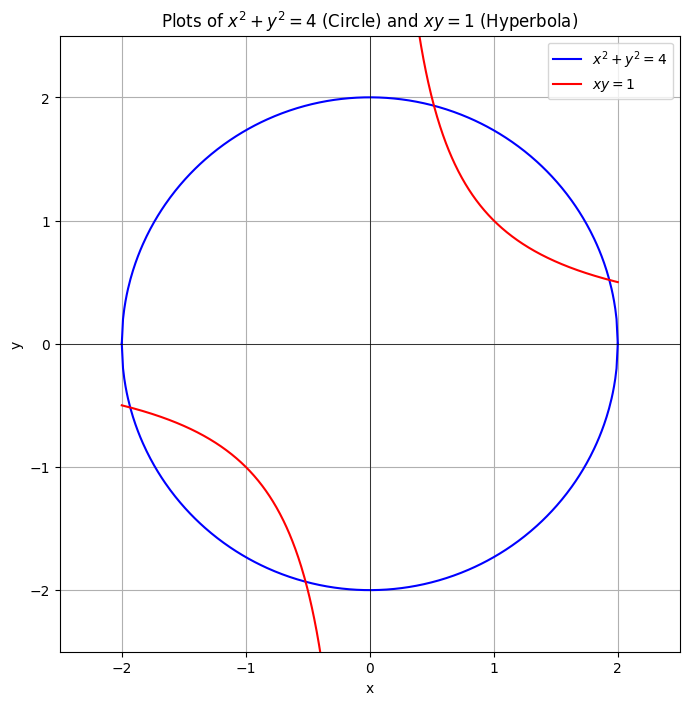

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system of equations
def circle(x):
    """ Circle: x^2 + y^2 = 4 => y = sqrt(4 - x^2) """
    return np.sqrt(4 - x**2)

def hyperbola(x):
    """ Hyperbola: xy = 1 => y = 1/x """
    return 1 / x

# Generate x values for the plots
x_circle = np.linspace(-2, 2, 400)
x_hyperbola_positive = np.linspace(0.1, 2, 400)  # Avoid x=0 for hyperbola
x_hyperbola_negative = np.linspace(-2, -0.1, 400)

# Compute y values for the circle (positive and negative branches)
y_circle_positive = circle(x_circle)
y_circle_negative = -circle(x_circle)

# Compute y values for the hyperbola (positive and negative x)
y_hyperbola_positive = hyperbola(x_hyperbola_positive)
y_hyperbola_negative = hyperbola(x_hyperbola_negative)

# Create the plot
plt.figure(figsize=(8, 8))

# Plot the circle
plt.plot(x_circle, y_circle_positive, label=r'$x^2 + y^2 = 4$', color='blue')
plt.plot(x_circle, y_circle_negative, color='blue')

# Plot the hyperbola
plt.plot(x_hyperbola_positive, y_hyperbola_positive, label=r'$xy = 1$', color='red')
plt.plot(x_hyperbola_negative, y_hyperbola_negative, color='red')

# Marking axes and grid
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)

# Set plot limits
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plots of $x^2 + y^2 = 4$ (Circle) and $xy = 1$ (Hyperbola)')

# Show the legend
plt.legend()

# Show the plot
plt.show()
